In [1]:
import pandas as pd
bbc=pd.read_csv('bbc_news_mixed.csv')

In [2]:
bbc.head()
bbc['label'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

gensim is a NLP library in python similar to SpaCy. 
-simple_preprocess() that performs basic preprocessing such as lower casing the text, tokenizing and ignoring tokens that are too small(lenght of 2) or too big(length of 15) in the corpus.

In [3]:
from gensim.utils import simple_preprocess

print(simple_preprocess(bbc.text[0]))

['cairn', 'shares', 'slump', 'on', 'oil', 'setback', 'shares', 'in', 'cairn', 'energy', 'uk', 'oil', 'firm', 'have', 'closed', 'down', 'after', 'disappointing', 'drilling', 'update', 'and', 'warning', 'over', 'possible', 'tax', 'demands', 'the', 'company', 'said', 'tests', 'had', 'shown', 'no', 'significant', 'finds', 'in', 'one', 'of', 'its', 'indian', 'oil', 'fields', 'but', 'was', 'upbeat', 'about', 'the', 'potential', 'of', 'other', 'areas', 'it', 'also', 'said', 'the', 'indian', 'government', 'had', 'told', 'it', 'to', 'pay', 'production', 'tax', 'for', 'which', 'cairn', 'argues', 'it', 'is', 'not', 'liable', 'cairn', 'shares', 'have', 'jumped', 'by', 'almost', 'this', 'year', 'investors', 'had', 'piled', 'into', 'cairn', 'after', 'the', 'company', 'announced', 'significant', 'oil', 'finds', 'in', 'india', 'this', 'year', 'chief', 'executive', 'bill', 'gammell', 'said', 'on', 'friday', 'he', 'was', 'disappointed', 'with', 'exploration', 'in', 'the', 'so', 'called', 'extension', 'a

in the above example, article has been tokenised, converted to lower case and words less than 2 alphabets are removed
let us do the same step across all the text

In [61]:
clean_bbc=bbc.text.apply(lambda x: simple_preprocess(x))
#just to make sure preprocess has hapenned 
clean_bbc[1][:10]

type(clean_bbc[1][1])

str

 some important parameters of gensim model are :

size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
window: (default 5) The maximum distance between a target word and words around the target word.
min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

let's use an embedding of size 300 and and train a skip gram (given a center word, the model should be able to predict words that fall in the context of the center word)


In [7]:
from gensim.models import Word2Vec

w2v=Word2Vec(clean_bbc,size=300,min_count=2,sg=1)#building word2vec model

In [11]:
print('no of words used:', len(w2v.wv.vocab))

no of words used: 18588


now that we have built the model, let's get the vectors for few words..

In [14]:
#any word will have 300 dimmensions as we mentioned in our model building
print('dimm for word "update" is:', w2v.wv.get_vector('update').shape)
w2v.wv.get_vector('update')

dimm for word "update" is: (300,)


array([-0.09191075,  0.11478841, -0.00951998, -0.17003517, -0.06011067,
       -0.00841509,  0.02809904,  0.00269008, -0.1561561 ,  0.09464687,
       -0.06998491,  0.19341357, -0.01393681, -0.05629824, -0.13081127,
        0.18748857, -0.05176939, -0.00105787,  0.22641309, -0.06256293,
       -0.01349553,  0.04009144,  0.02628575,  0.27639797, -0.12545824,
       -0.04274383,  0.04077545,  0.00229664,  0.08780013,  0.04719721,
       -0.18349671, -0.10157923, -0.12291513,  0.12797114,  0.06407789,
       -0.11630086,  0.1457036 , -0.08373711, -0.07120527, -0.02620047,
        0.19982016, -0.07139057, -0.11560734,  0.03378392, -0.01462515,
        0.04435378, -0.08941176, -0.03901974, -0.03287286, -0.22616947,
        0.0154144 ,  0.1323367 , -0.05855173,  0.14599727, -0.10003614,
       -0.02162195, -0.1951531 , -0.15676044, -0.09894346, -0.04703739,
        0.0084629 ,  0.14588384,  0.10091967, -0.02322787,  0.07501419,
       -0.10300254,  0.23707117,  0.04100895,  0.01901884, -0.08

let us also get most similar words for any center word

In [17]:
print('similar words for "update" found in bbc texts:', w2v.wv.most_similar('oil'))

similar words for "update" found in bbc texts: [('gas', 0.8877936601638794), ('giant', 0.8277593851089478), ('telecoms', 0.8184065222740173), ('energy', 0.8081611394882202), ('steel', 0.7985278367996216), ('fuel', 0.7919976711273193), ('unit', 0.7848036289215088), ('china', 0.7845038175582886), ('costs', 0.7840332984924316), ('copper', 0.7706196904182434)]


In [18]:
w2v.wv.most_similar('poverty')

[('infrastructure', 0.9201074838638306),
 ('resources', 0.9200001955032349),
 ('supplies', 0.9073126316070557),
 ('raising', 0.8991946578025818),
 ('reducing', 0.8980662822723389),
 ('invest', 0.8960729837417603),
 ('strategic', 0.8956148624420166),
 ('initiatives', 0.8949234485626221),
 ('export', 0.8929666876792908),
 ('agricultural', 0.8913655877113342)]

This model is performing fairly okay, given it got trained only on 2225 documents and 18588 words. Googles word2vec 
gets trained on very big corposes. This is the reason why google's word2vec might give good result.
If google has word2vec why should be build our word2vec from the scratch??? because..we might be having corpus which contains
lot of medical data and google might not be having it..so when we use google word2vec we will be having bad accuracy

now that we have built the model and got the similarities working, let's check out how actually they work..
let's visualise them by projecting the words onto model..

In [20]:
samp_words=w2v.wv.most_similar('oil')+w2v.wv.most_similar('music')+w2v.wv.most_similar('football')
samp_words

[('gas', 0.8877936601638794),
 ('giant', 0.8277593851089478),
 ('telecoms', 0.8184065222740173),
 ('energy', 0.8081611394882202),
 ('steel', 0.7985278367996216),
 ('fuel', 0.7919976711273193),
 ('unit', 0.7848036289215088),
 ('china', 0.7845038175582886),
 ('costs', 0.7840332984924316),
 ('copper', 0.7706196904182434),
 ('digital', 0.7969462871551514),
 ('video', 0.7845475673675537),
 ('recorders', 0.7711256742477417),
 ('portable', 0.7605506181716919),
 ('gaming', 0.7563401460647583),
 ('recorder', 0.7457741498947144),
 ('movies', 0.7356342077255249),
 ('tv', 0.7354165315628052),
 ('audio', 0.7251417636871338),
 ('screen', 0.7227457761764526),
 ('rugby', 0.8582456111907959),
 ('influential', 0.817884624004364),
 ('scottish', 0.8169686198234558),
 ('premier', 0.8124054670333862),
 ('lions', 0.801287055015564),
 ('spirit', 0.8007616400718689),
 ('irb', 0.7964897751808167),
 ('pro', 0.7920151352882385),
 ('presented', 0.7875747680664062),
 ('prominent', 0.7875392436981201)]

In [23]:
words=list(map(lambda x: x[0],samp_words)) #from samp words, extracting only similar words and not their score
words

['gas',
 'giant',
 'telecoms',
 'energy',
 'steel',
 'fuel',
 'unit',
 'china',
 'costs',
 'copper',
 'digital',
 'video',
 'recorders',
 'portable',
 'gaming',
 'recorder',
 'movies',
 'tv',
 'audio',
 'screen',
 'rugby',
 'influential',
 'scottish',
 'premier',
 'lions',
 'spirit',
 'irb',
 'pro',
 'presented',
 'prominent']

In [34]:
#using PCA to bring down the dimmensions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def w2vec(word_list):
    proj=w2v[word_list]
    pca=PCA(n_components=2)
    res=pca.fit_transform(proj)
    plt.scatter(res[:,0],res[:,1])
    for i,word in enumerate(word_list):
        plt.annotate(word,xy=(res[i,0],res[i,1]))
    plt.figure(figsize=(15,15))
    plt.show()
    
    

C:\Users\nsr156\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


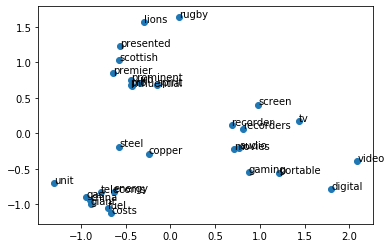

<Figure size 1080x1080 with 0 Axes>

In [35]:
w2vec(words)

we used three different words from 3 families..oil,music and foot ball..and you can see 3 clusters...
we have achived this just using 2225 documents and 18588 words..
let's download and use google's word2vec which has 3million words each word has 300 dimmensions..

    

In [43]:
#unzip and install the googles model
# !gzip -d GoogleNews-vectors-negative300.bin 

from gensim.models import KeyedVectors
w2vec_goo = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

One of the impressive things about word2vec is it's ability to capture semantic relationship between words.
That is the reason that you can do cool stuff like perform linear algebra on words and get an appropriate output. 
Have a look at the following example:

airplane - fly + drive = car

If you pass the left hand side of the above equation to the model, it will give the right handside. 
Which makes sense because what would you get if you remove the ability to fly from an airplane? 
And add the ability to drive? You would get a car!

In [45]:
w2vec_goo.most_similar(positive=['airplane','drive'],negative=['fly'],topn=5)
w2vec.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('car', 0.511200487613678),
 ('drives', 0.47777241468429565),
 ('automobile', 0.45616623759269714),
 ('vehicle', 0.44856154918670654),
 ('SUV', 0.44360122084617615)]

classification using google's word2vec and our word2vec 
word2vec gives vector representation of words..if vector representation for a document or sentence needs to be calulated
then the vectors of each word that is present in sentence/document needs to be averaged



In [72]:
import numpy as np
def get_embeddings(doc_tokens,pre_trained): #takes tokens and pre_trained (boolean scalar) as inputs
    if pre_trained:
        model=w2v #our model
    else:
        model=w2vec_goo #google's model
    embeddings=[]
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
#     embedd=[model.wv.word_vec(tok) for tok in doc_tokens if (model.wv.vocab)]#appending word2vec of all the tokens present in doc
    return np.mean(embeddings,axis=0) #mean for all rows (observastions)
            

In [83]:
#sending pre-processed bbc dataset to get_embeddings function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x_own=clean_bbc.apply(lambda x: get_embeddings(x,1))#0-using our own model

x_own = pd.DataFrame(x_own.tolist())
print('X shape:', x_own.shape)
labenc=LabelEncoder()
y=labenc.fit_transform(bbc.label)
x_train_own,x_test_own,y_train_own,y_test_own=train_test_split(x_own,y,test_size=0.2,random_state=100)
#building and testing model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb=GaussianNB()
model_nb_own=nb.fit(x_train_own,y_train_own)
pred_own=model_nb_own.predict(x_test_own)
accuracy_score(y_test_own,pred_own)

X shape: (2225, 300)


0.8764044943820225

In [84]:
x_goo=clean_bbc.apply(lambda x: get_embeddings(x,0))#0-using google model

x_goo = pd.DataFrame(x_goo.tolist())
print('X shape:',x_goo.shape)
labenc=LabelEncoder()
y=labenc.fit_transform(bbc.label)
x_train_goo,x_test_goo,y_train_goo,y_test_goo=train_test_split(x_goo,y,test_size=0.2,random_state=100)
#building and testing model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb=GaussianNB()
model_nb_goo=nb.fit(x_train_goo,y_train_goo)
pred_goo=model_nb_goo.predict(x_test_goo)
accuracy_score(y_test_goo,pred_goo)

C:\Users\nsr156\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
C:\Users\nsr156\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


X shape: (2225, 300)


0.9325842696629213

This is amazing, when TF-IDF was applied on the same dataset, it required 1500 features to get an accuracy of 95%
where as using word2vec we are able to achieve nearly same accuracy (93%) with one-fifth of the features

with our own word to vec model we achieved an accuracy of 89.98% just training 18000 words...The more rich the vocabulary is, the better the model generates the semantic vectors of a word.